Spotify Genre Segmentation

In [3]:
#import the libraries
import pandas as pd
import numpy as np

In [4]:
# Load the Dataset
spotify_data = pd.read_csv("spotify dataset.csv")

In [5]:
spotify_data.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... key  loudness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   6    -2.634   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  11    -4.969   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -3.432   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   7    -3.778   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms  
0  122.036       194754  
1   99.972       162600  
2  124.008       176616  
3  121.956       169093  
4  123.976       189052  

[5 rows x 23 columns]

In [6]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [7]:
spotify_data.describe()

track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.719499      0.565711      0.107068      0.175334   
std        2.988436      0.495671      0.101314      0.219633   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171000      0.000000      0.041000      0.015100   
50%       -6.166000      1.000000      0.062500      0.080400   
75%       -4.645000      1.000000      0.132000      0.255000   
max        1.275000      1.000000      0.918000      0.994000   

       instrumentalness      liveness       valence         tempo  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean           0.084747      0.190176      0.510561    120.881132   
std            0.224230      0.154317      0.233146     26.903624   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.092700      0.331000     99.960000   
50%            0.000016      0.127000      0.512000    121.984000   
75%            0.004830      0.248000      0.693000    133.918000   
max            0.994000      0.996000      0.991000    239.440000   

         duration_ms  
count   32833.000000  
mean   225799.811622  
std     59834.006182  
min      4000.000000  
25%    187819.000000  
50%    216000.000000  
75%    253585.000000  
max    517810.000000

In [8]:
# Check for missing values in the dataset
missing_values = spotify_data.isnull().sum()
missing_values[missing_values > 0]

track_name          5
track_artist        5
track_album_name    5
dtype: int64

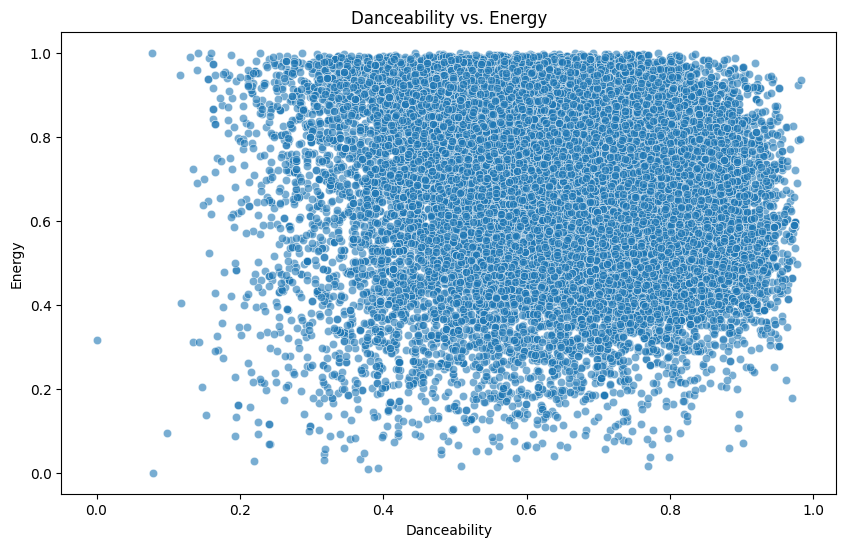

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Danceability vs. Energy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_data, x="danceability", y="energy", alpha=0.6)
plt.title("Danceability vs. Energy")
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.show()

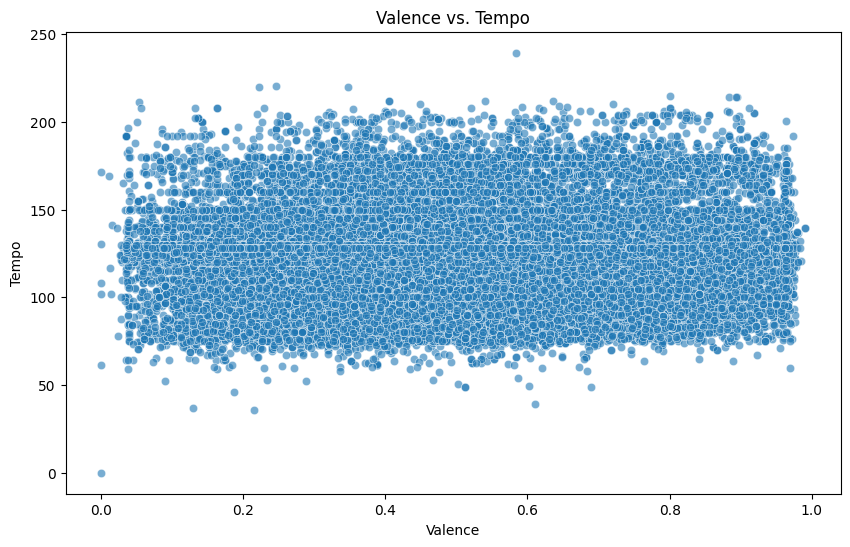

In [11]:
# Scatter plot for Valence vs. Tempo
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_data, x="valence", y="tempo", alpha=0.6)
plt.title("Valence vs. Tempo")
plt.xlabel("Valence")
plt.ylabel("Tempo")
plt.show()

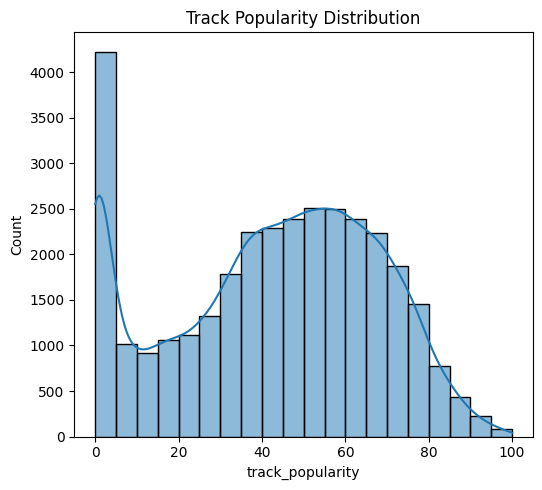

In [13]:
# Set up the figure with subplots
plt.figure(figsize=(15, 5))

# Histogram for track popularity
plt.subplot(1, 3, 1)
sns.histplot(spotify_data["track_popularity"], bins=20, kde=True)
plt.title("Track Popularity Distribution")

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

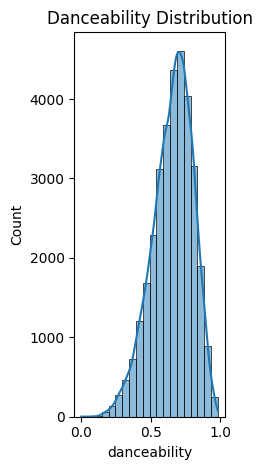

In [14]:
# Histogram for danceability
plt.subplot(1, 3, 2)
sns.histplot(spotify_data["danceability"], bins=20, kde=True)
plt.title("Danceability Distribution")

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

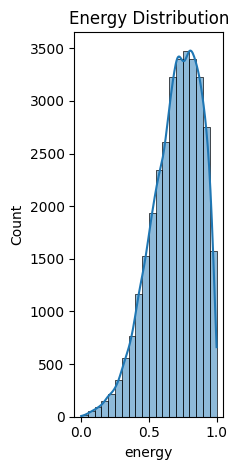

In [15]:
# Histogram for energy
plt.subplot(1, 3, 3)
sns.histplot(spotify_data["energy"], bins=20, kde=True)
plt.title("Energy Distribution")  
# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

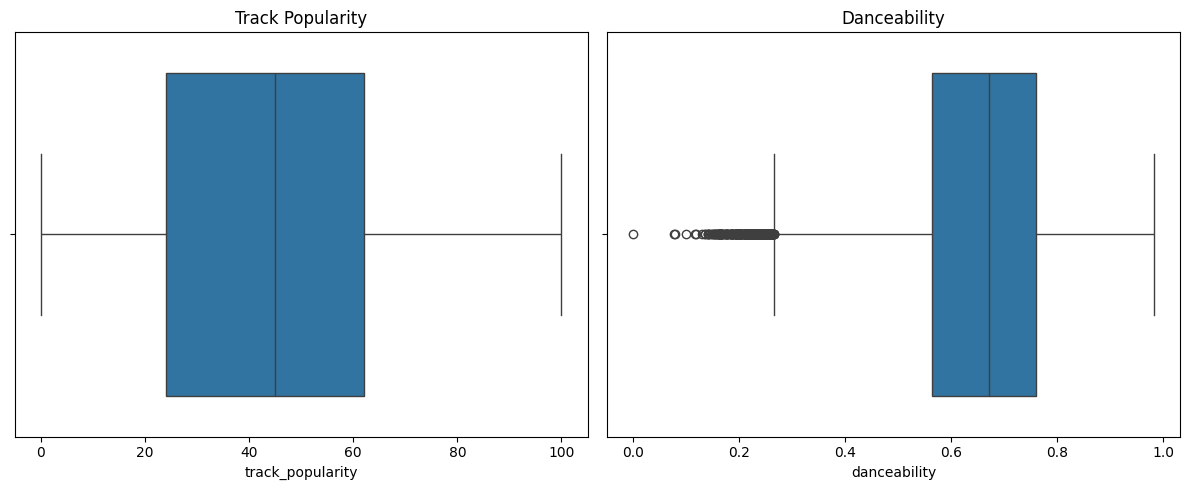

In [16]:
# Set up the figure with subplots
plt.figure(figsize=(12, 5))

# Box plot for track popularity
plt.subplot(1, 2, 1)
sns.boxplot(x="track_popularity", data=spotify_data)
plt.title("Track Popularity")

# Box plot for danceability
plt.subplot(1, 2, 2)
sns.boxplot(x="danceability", data=spotify_data)
plt.title("Danceability")

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler

# Select relevant numerical features for clustering
features = [
    "danceability",
    "energy",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "duration_ms",
]

# Handle missing values (if any)
spotify_data = spotify_data.dropna(subset=features)

In [18]:
# Normalize the features
scaler = StandardScaler()
spotify_data_scaled = scaler.fit_transform(spotify_data[features])

In [19]:
from sklearn.cluster import KMeans

# Choose the number of clusters (K)
num_clusters = 5

# Train the K-Means model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
spotify_data["cluster"] = kmeans.fit_predict(spotify_data_scaled)

<Figure size 1200x800 with 0 Axes>

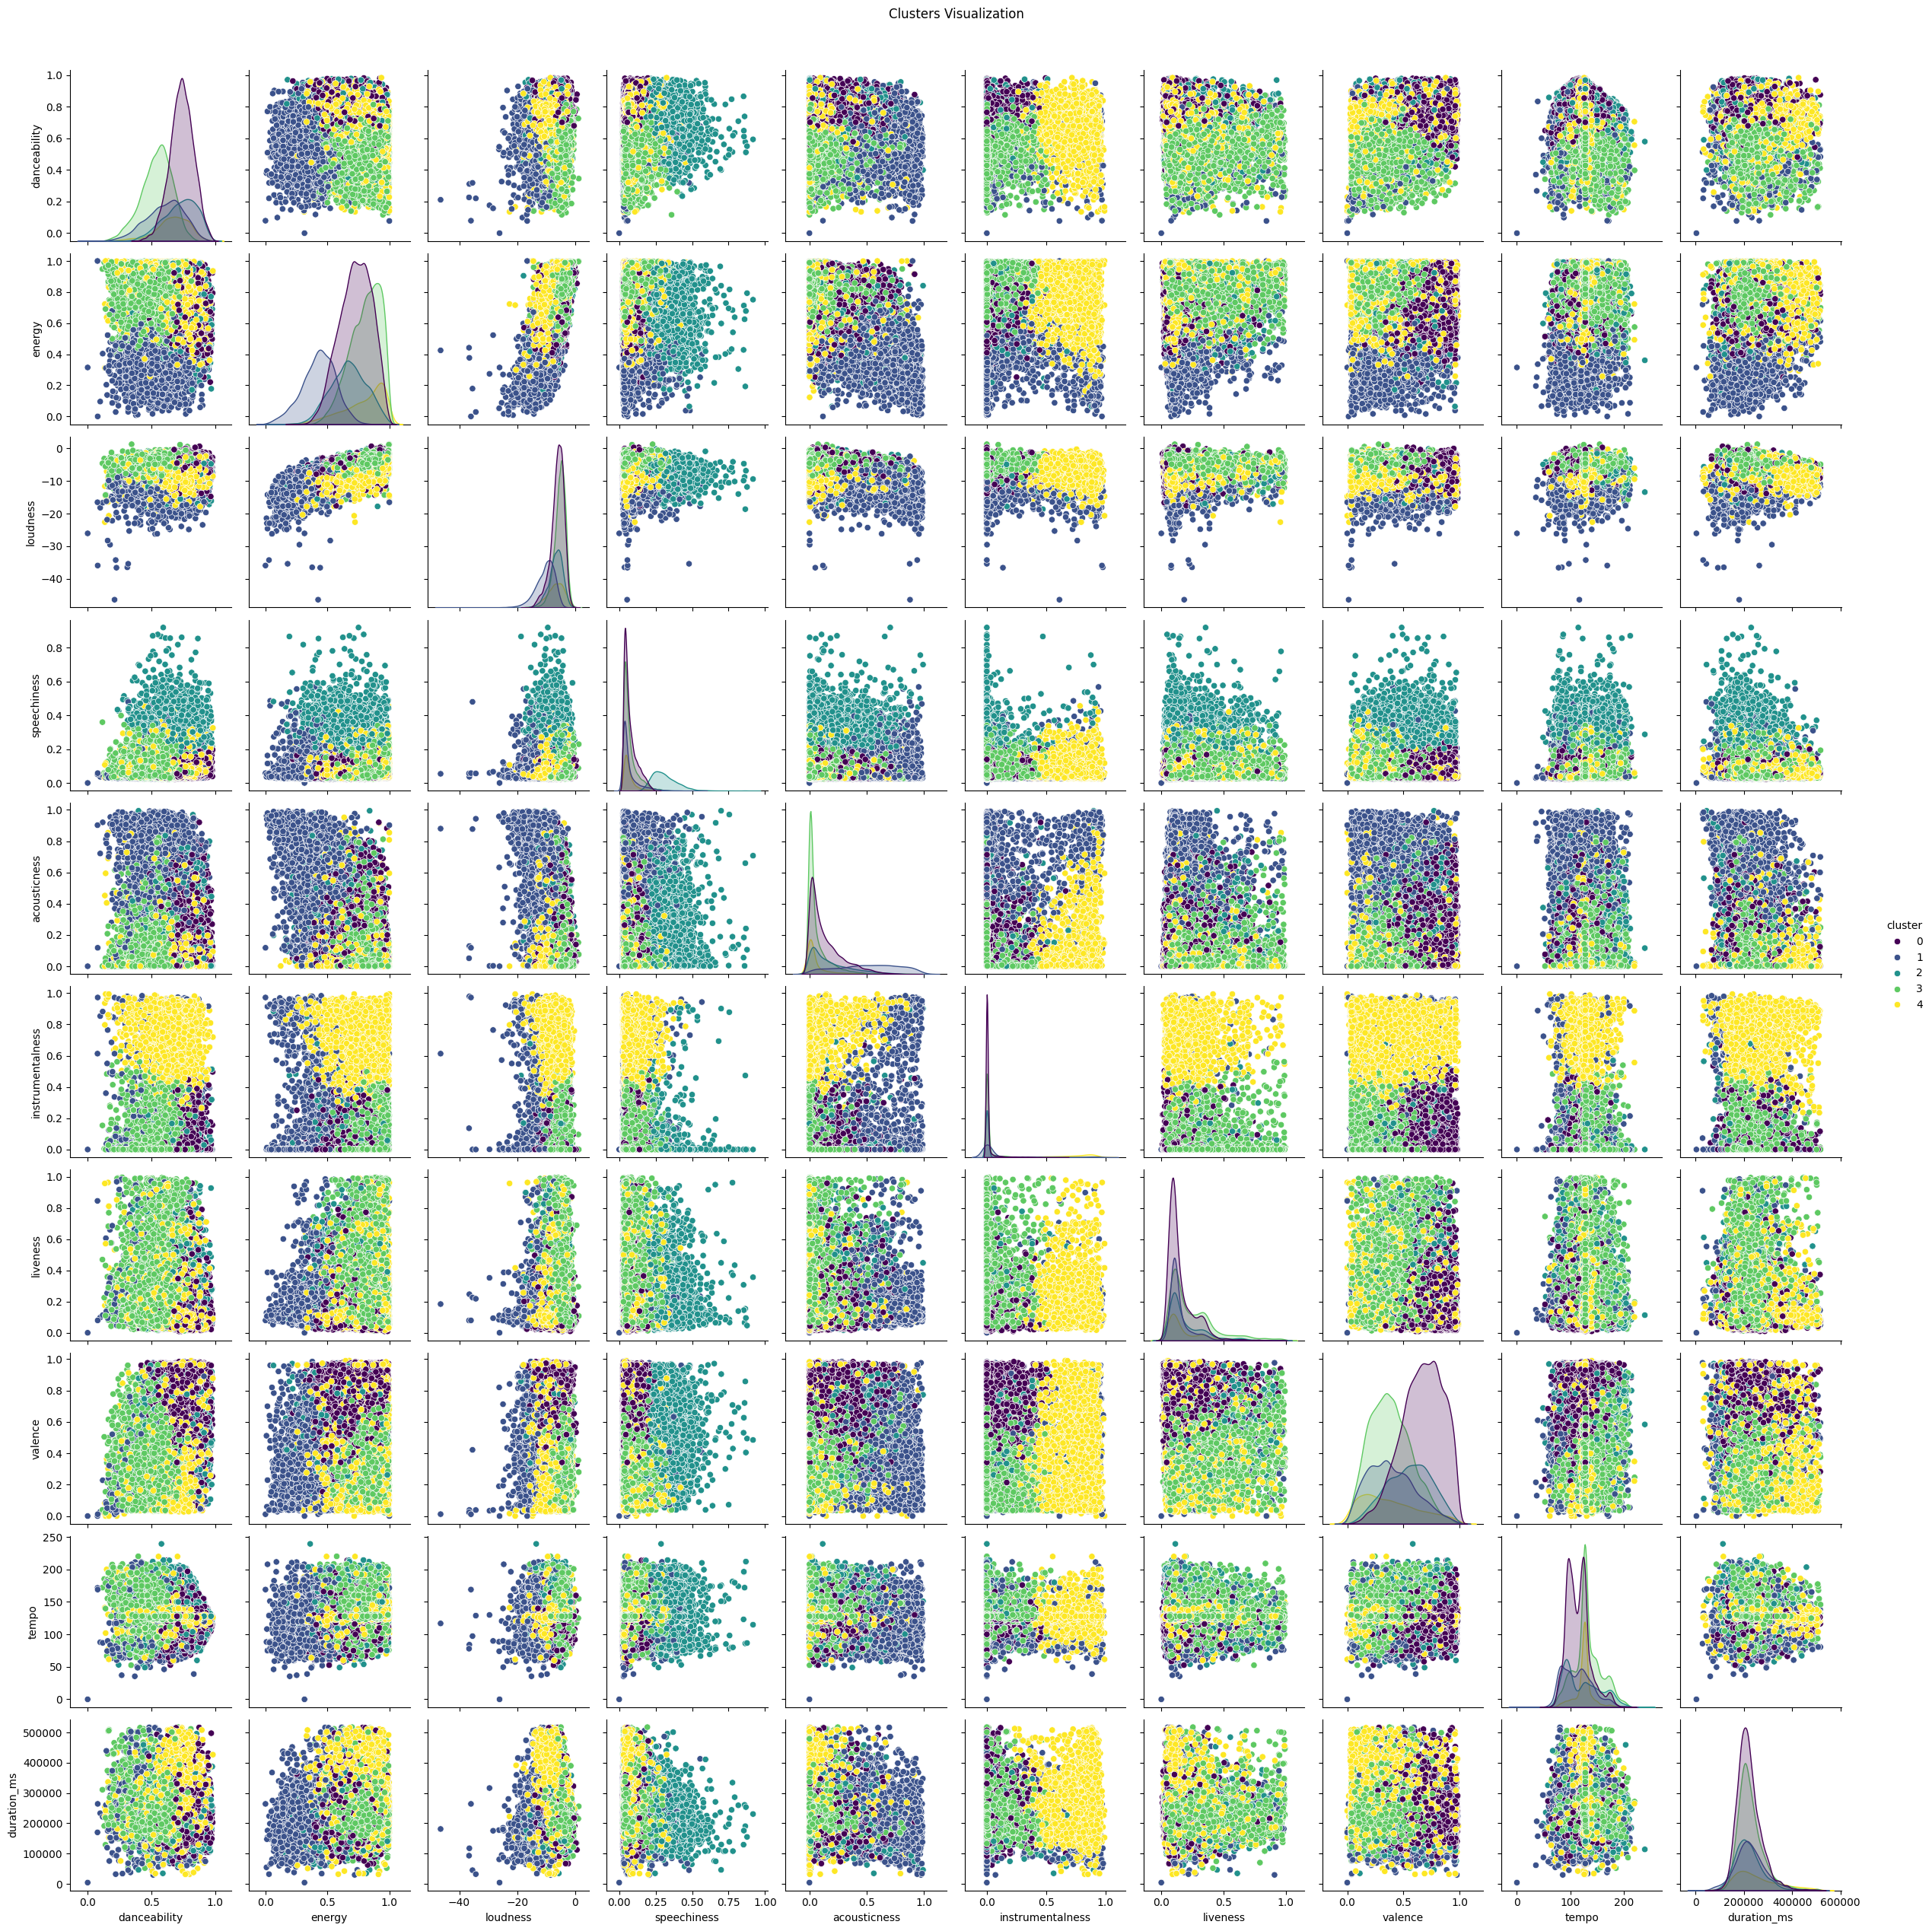

danceability    energy   loudness  speechiness  acousticness  \
0      0.735390  0.725076  -6.176241     0.074110      0.139327   
1      0.602719  0.429220 -10.446573     0.072448      0.509043   
2      0.723655  0.668365  -6.793974     0.311365      0.180719   
3      0.539839  0.802512  -5.282423     0.073785      0.066364   
4      0.661210  0.785400  -6.949740     0.071490      0.071950   

   instrumentalness  liveness   valence       tempo    duration_ms  cluster  
0          0.014105  0.154690  0.664976  114.273073  220889.388979        0  
1          0.089582  0.156335  0.392843  112.605950  227598.263694        1  
2          0.010457  0.202916  0.549109  122.311474  217847.151424        2  
3          0.025015  0.249410  0.387432  132.139870  227953.400134        3  
4          0.740439  0.188496  0.386636  125.240432  251701.740669        4

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the clusters using a pair plot
plt.figure(figsize=(12, 8))
sns.pairplot(spotify_data, hue="cluster", vars=features, palette="viridis")
plt.suptitle("Clusters Visualization", y=1.02)
plt.show()

# Analyze cluster characteristics
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=features)
cluster_df["cluster"] = range(num_clusters)
cluster_df

In [21]:
# Recommendation system function
def recommend_tracks(track_id, num_recommendations=5):
    # Find the cluster for the given track_id
    track_cluster = spotify_data.loc[
        spotify_data["track_id"] == track_id, "cluster"
    ].values[0]

    # Get tracks from the same cluster
    cluster_tracks = spotify_data[spotify_data["cluster"] == track_cluster]

    # Exclude the input track from recommendations
    cluster_tracks = cluster_tracks[cluster_tracks["track_id"] != track_id]

    # Randomly select the specified number of recommendations
    recommendations = cluster_tracks.sample(num_recommendations)

    return recommendations[
        ["track_id", "track_name", "track_artist", "playlist_name", "playlist_genre"]
    ]

In [26]:
# Example usage of the recommendation system:
track_id_example = spotify_data["track_id"].iloc[18]  # Using the first track in the dataset as an example
recommendations = recommend_tracks(track_id_example)
print(recommendations)

                     track_id                              track_name  \
20128  1dA9GzuP546CjJT0n9tZoe            Lazy Day (feat. Danny Ocean)   
19135  0AAl3LtvIhEilWXZmYHeh5                                    More   
23741  2eXLx58ykMF6jayu2WZpPt  Quanto amore si dà (feat. Guè Pequeno)   
2936   3HW030T8eqPs8wpsgZqCGM                              Q.U.E.E.N.   
8662   74OqjT3PMVWlZAyqUt4FgG                          We Takin' Over   

         track_artist                                      playlist_name  \
20128        Fuse ODG                          Global Top 50 | 2020 Hits   
19135            Zion                                  Reggaeton De Ayer   
23741  Gigi D'Alessio  Musica Italiana 2020 - Playlist Pop & Hip-Hop ...   
2936    Janelle Monáe                              This Is Janelle Monáe   
8662        DJ Khaled                               Gangster Rap Workout   

      playlist_genre  
20128          latin  
19135          latin  
23741            r&b  
2936        